In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.optimize import curve_fit

from runDataClass import runData

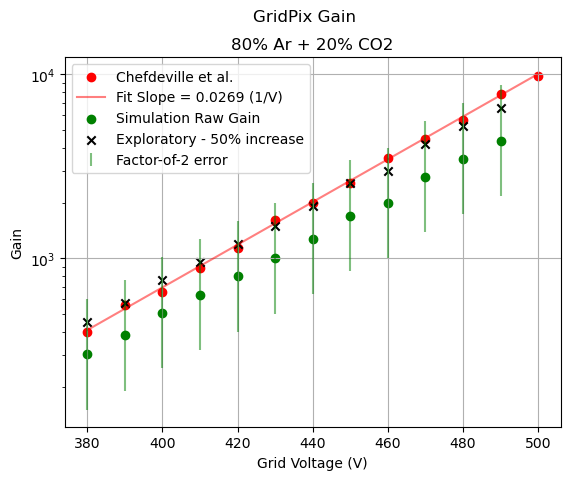

In [2]:
gridVoltage = np.linspace(380, 500, 13)

## https://doi.org/10.1016/j.nima.2005.11.065
expGain = np.array([397, 555, 656, 885, 1138, 1614, 2004, 2558, 3527, 4440, 5669, 7816, 9772])

rawGain = np.array([300.7, 382, 505.8, 636, 799.7, 1000.8, 1276.5, 1708.5, 1998.4, 2775.7, 3484.3, 4352.1])


fig = plt.figure()
fig.suptitle(f'GridPix Gain')
ax1 = fig.add_subplot(111)

ax1.scatter(
    gridVoltage, expGain,
    label='Chefdeville et al.', c='r'
)
ax1.plot(
    [380, 500], [397*math.exp(0.0269), 9772*math.exp(0.0269)],
    label='Fit Slope = 0.0269 (1/V)', c='r', alpha=0.5
)

ax1.scatter(
    gridVoltage[0:len(rawGain)], rawGain,
    label='Simulation Raw Gain', c='g'
)
ax1.errorbar(
    gridVoltage[0:len(rawGain)], rawGain,
    xerr=None, yerr=[rawGain/2, rawGain],
    label='Factor-of-2 error', c='g', alpha=0.5, ls=''
)

ax1.scatter(
    gridVoltage[0:len(rawGain)], rawGain*1.5,
    label='Exploratory - 50% increase', c='k', marker='x'
)



ax1.set_title('80% Ar + 20% CO2')
ax1.set_yscale('log')
ax1.set_xlabel('Grid Voltage (V)')
ax1.set_ylabel('Gain')
plt.legend()
plt.grid()
plt.show()

In [3]:
expRunNo = np.array([20000, 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20014, 20015, 20016, 20017])
gridVoltage = np.linspace(380, 500, 13)


expGain = []
expIBN = []
expIBF = []
expIBFErr = []
expIBFGain = []

for inRun in expRunNo:
    simData = runData(inRun)

    expGain.append(simData.getRunParameter('Raw Gain'))
    expIBN.append(simData.getRunParameter('Average IBN'))
    expIBF.append(simData.getRunParameter('Average IBF'))
    expIBFErr.append(simData.getRunParameter('IBF Error'))
    expIBFGain.append(simData.getRunParameter('IBF * Raw Gain'))

expGain = np.array(expGain)
expIBN = np.array(expIBN)
expIBF = np.array(expIBF)
expIBFErr = np.array(expIBFErr)
expIBFGain = np.array(expIBFGain)

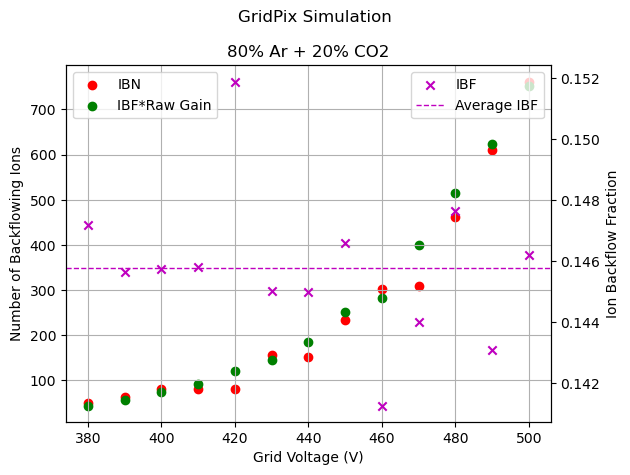

In [4]:
#expIBN = np.array([50.2, 62.9, 80.6, 81.6, 80.7, 156.3, 152.6, 233.7, 303, 310, 461.6, 609.7])
#expIBF = np.array([0.147, 0.146, 0.146, 0.146, 0.152, 0.145, 0.145, 0.147, 0.141, 0.144, 0.148, 0.143])
#expIBFGain = np.array([44.3, 55.6, 73.7, 92.3, 121.5, 145.1, 185.1, 250.4, 282.3, 399.7, 514.3, 622.8])

fig, ax1 = plt.subplots()
fig.suptitle(f'GridPix Simulation')

ax1.scatter(
    gridVoltage[0:len(expIBN)], expIBN,
    label='IBN', c='r'
)

ax1.scatter(
    gridVoltage[0:len(expIBFGain)], expIBFGain,
    label='IBF*Raw Gain', c='g'
)

ax2 = ax1.twinx()
ax2.scatter(
    gridVoltage[0:len(expIBF)], expIBF,
    label='IBF', c='m', marker='x'
)
ax2.axhline(
    y=expIBF.mean(), 
    color='m', linestyle='--', linewidth=1, label='Average IBF'
)



ax1.set_title('80% Ar + 20% CO2')
#ax1.set_yscale('log')
ax1.set_xlabel('Grid Voltage (V)')
ax1.set_ylabel('Number of Backflowing Ions')
ax1.legend()
ax1.grid()

ax2.set_ylabel('Ion Backflow Fraction')
ax2.legend()

plt.tight_layout()
plt.show()

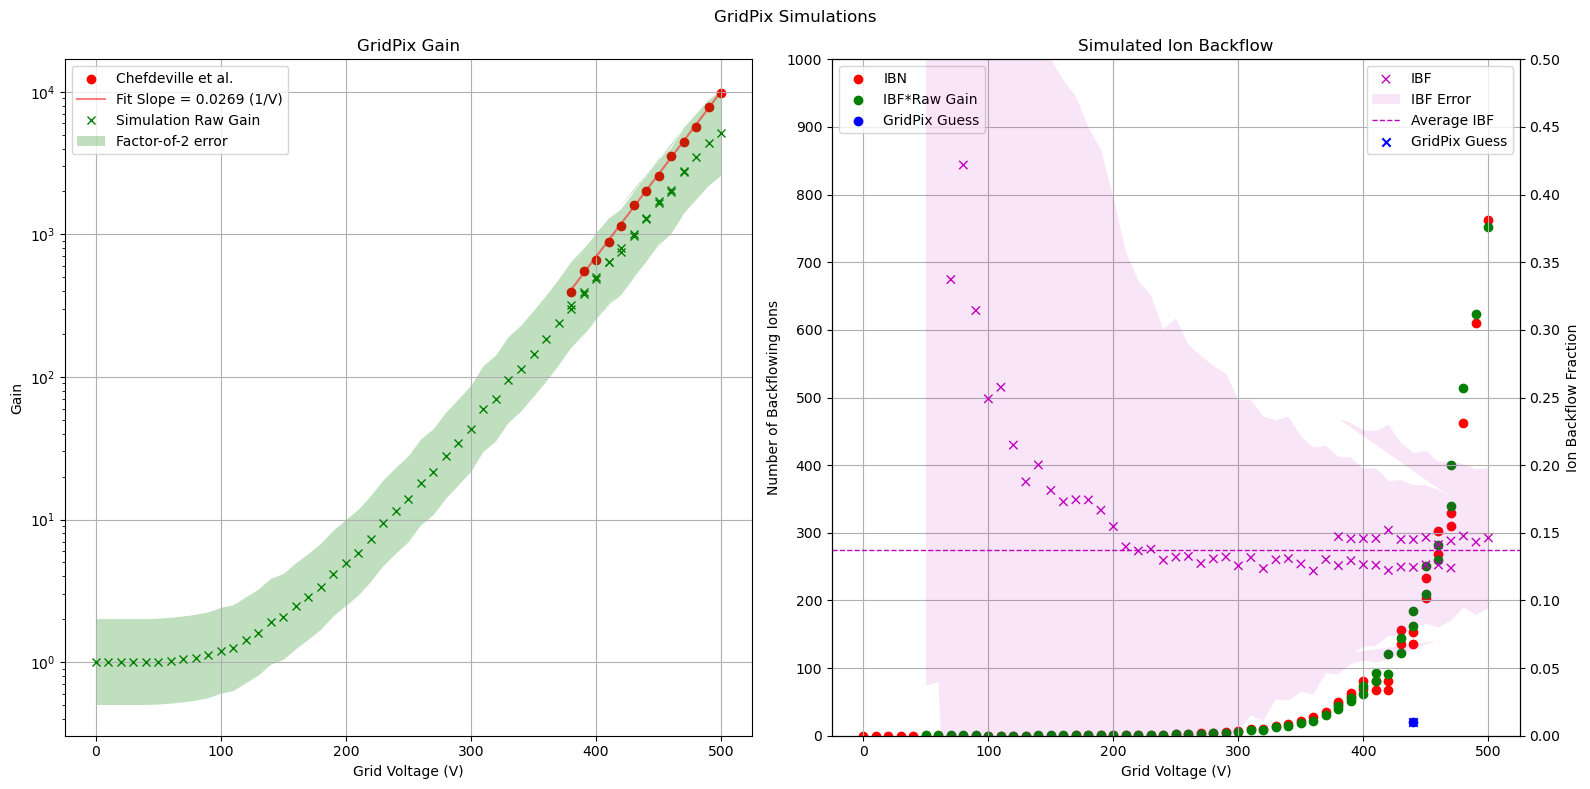

In [5]:
## https://doi.org/10.1016/j.nima.2005.11.065
expVoltage = np.linspace(380, 500, 13)
expGain = np.array([397, 555, 656, 885, 1138, 1614, 2004, 2558, 3527, 4440, 5669, 7816, 9772])

runNos = np.arange(21000, 21048)
simVoltages = np.linspace(0, 470, 48)

#Add old runs
oldRuns = [20000, 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20014, 20015, 20016, 20017]
runNos = np.append(runNos, oldRuns)
simVoltages = np.append(simVoltages, np.linspace(380, 500, 13))



simGain = []
simIBF = []
simIBN = []
simIBFErr = []
simIBFGain = []

for inRun in runNos:
    simData = runData(inRun)
    simGain.append(simData.getRunParameter('Raw Gain'))
    simIBN.append(simData.getRunParameter('Average IBN'))
    simIBF.append(simData.getRunParameter('Average IBF'))
    simIBFErr.append(simData.getRunParameter('IBF Error'))
    simIBFGain.append(simData.getRunParameter('IBF * Raw Gain'))


simGain = np.array(simGain)
simIBN = np.array(simIBN)
simIBF = np.array(simIBF)
simIBFErr = np.array(simIBFErr)
simIBFGain = np.array(simIBFGain)

IBFweights = 1 / (simIBFErr**2)
notNAN = ~np.isnan(simIBF)
filteredIBF = simIBF[notNAN]
filteredWeights = IBFweights[notNAN]
averageIBF = np.average(filteredIBF, weights=filteredWeights)


fig = plt.figure(figsize=(16, 8))
fig.suptitle(f'GridPix Simulations')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(
    expVoltage, expGain,
    label='Chefdeville et al.', c='r'
)
ax1.plot(
    [380, 500], [397*math.exp(0.0269), 9772*math.exp(0.0269)],
    label='Fit Slope = 0.0269 (1/V)', c='r', alpha=0.5
)
ax1.plot(
    simVoltages, simGain,
    label='Simulation Raw Gain', c='g', ls='', marker='x'
)

ax1.fill_between(
    simVoltages, simGain/2, 2*simGain, 
    label='Factor-of-2 error', facecolor='g', alpha=0.25, interpolate=True
)

ax2.scatter(
    simVoltages, simIBN,
    label='IBN', c='r'
)
ax2.scatter(
    simVoltages, simIBFGain,
    label='IBF*Raw Gain', c='g'
)
ax2.scatter(
    [440], [20],
    label='GridPix Guess', c='b'
)

ax3 = ax2.twinx()
ax3.scatter(
    simVoltages, simIBF,
    label='IBF', c='m', marker='x', ls=''
)
ax3.fill_between(
    simVoltages, simIBF-simIBFErr, simIBF+simIBFErr, 
    label='IBF Error', facecolor='m', alpha=0.1, interpolate=True
)
ax3.axhline(
    y=averageIBF, 
    color='m', linestyle='--', linewidth=1, label='Average IBF'
)
ax3.scatter(
    [440], [0.01],
    label='GridPix Guess', c='b', marker='x'
)

ax1.set_title('GridPix Gain')
ax1.set_yscale('log')
ax1.set_xlabel('Grid Voltage (V)')
ax1.set_ylabel('Gain')
ax1.legend()
ax1.grid()

ax2.set_title('Simulated Ion Backflow')
ax2.set_xlabel('Grid Voltage (V)')
ax2.set_ylabel('Number of Backflowing Ions')
ax2.set_ylim([0, 1e3])
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 11))
ax2.grid()
ax2.legend(loc='upper left')

ax3.set_ylabel('Ion Backflow Fraction')
ax3.set_ylim([0, 0.5])
ax3.set_yticks(np.linspace(ax3.get_ybound()[0], ax3.get_ybound()[1], 11))
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

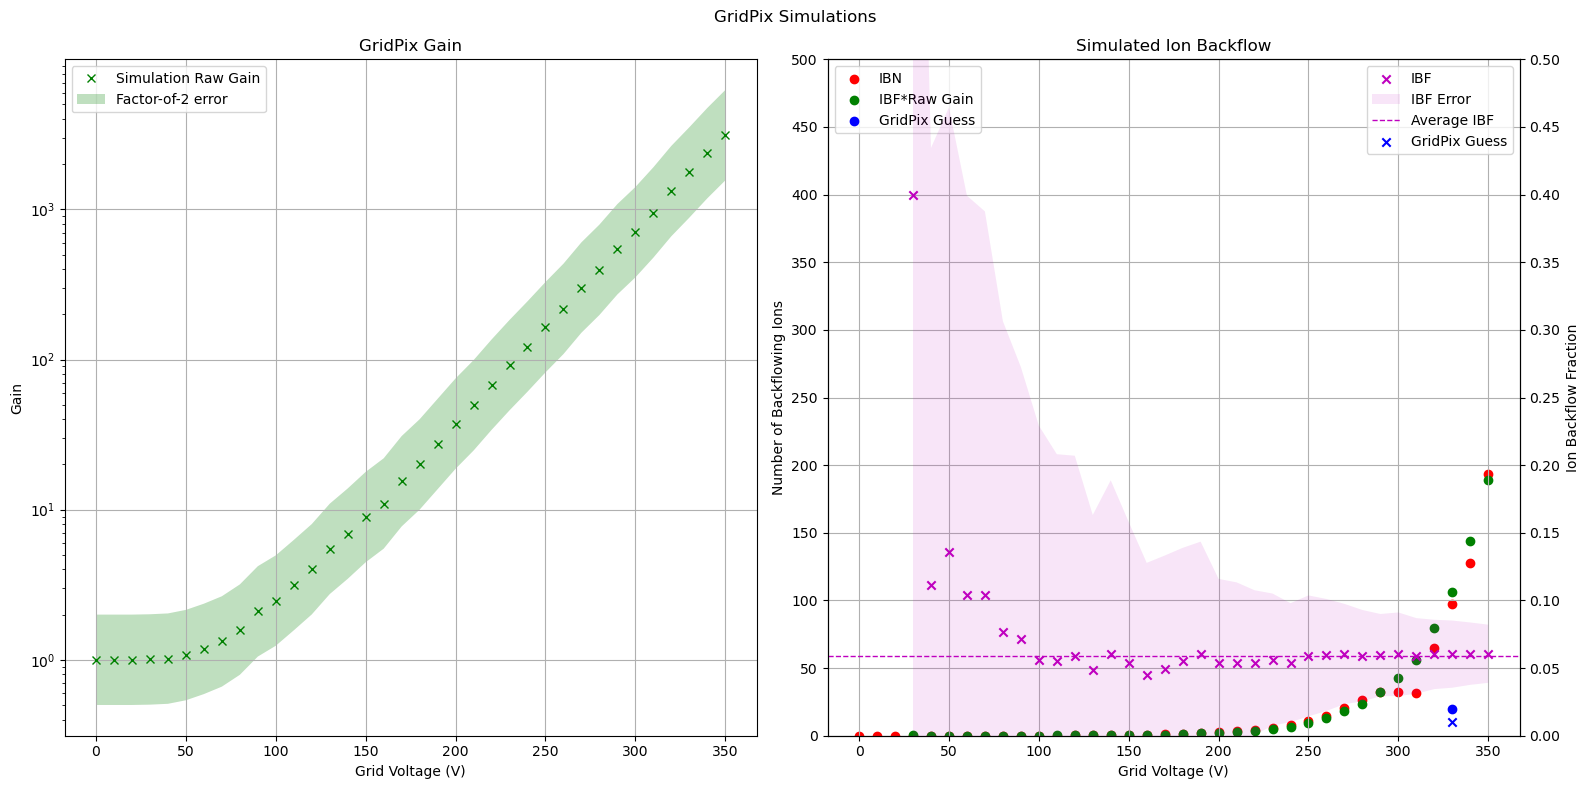

In [6]:
runNoT2K = np.arange(21049, 21085)
simVoltT2K = np.linspace(0, 350, 36)

T2KGain = []
T2KIBF = []
T2KIBN = []
T2KIBFErr = []
T2KIBFGain = []

for inRun in runNoT2K:
    simData = runData(inRun)
    T2KGain.append(simData.getRunParameter('Raw Gain'))
    T2KIBN.append(simData.getRunParameter('Average IBN'))
    T2KIBF.append(simData.getRunParameter('Average IBF'))
    T2KIBFErr.append(simData.getRunParameter('IBF Error'))
    T2KIBFGain.append(simData.getRunParameter('IBF * Raw Gain'))


T2KGain = np.array(T2KGain)
T2KIBN = np.array(T2KIBN)
T2KIBF = np.array(T2KIBF)
T2KIBFErr = np.array(T2KIBFErr)
T2KIBFGain = np.array(T2KIBFGain)

T2KIBFweights = 1 / (T2KIBFErr**2)
notNANT2K = ~np.isnan(T2KIBF)
filteredT2KIBF = T2KIBF[notNANT2K]
filteredT2KWeights = T2KIBFweights[notNANT2K]
averageT2KIBF = np.average(filteredT2KIBF, weights=filteredT2KWeights)

fig = plt.figure(figsize=(16, 8))
fig.suptitle(f'GridPix Simulations')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(
    simVoltT2K, T2KGain,
    label='Simulation Raw Gain', c='g', ls='', marker='x'
)

ax1.fill_between(
    simVoltT2K, T2KGain/2, 2*T2KGain, 
    label='Factor-of-2 error', facecolor='g', alpha=0.25, interpolate=True
)

ax2.scatter(
    simVoltT2K, T2KIBN,
    label='IBN', c='r'
)
ax2.scatter(
    simVoltT2K, T2KIBFGain,
    label='IBF*Raw Gain', c='g'
)
ax2.scatter(
    [330], [20],
    label='GridPix Guess', c='b'
)

ax3 = ax2.twinx()
ax3.scatter(
    simVoltT2K, T2KIBF,
    label='IBF', c='m', marker='x'
)
ax3.fill_between(
    simVoltT2K, T2KIBF-T2KIBFErr, T2KIBF+T2KIBFErr, 
    label='IBF Error', facecolor='m', alpha=0.1, interpolate=False
)
ax3.axhline(
    y=averageT2KIBF, 
    color='m', linestyle='--', linewidth=1, label='Average IBF'
)
ax3.scatter(
    [330], [0.01],
    label='GridPix Guess', c='b', marker='x'
)

ax1.set_title('GridPix Gain')
ax1.set_yscale('log')
ax1.set_xlabel('Grid Voltage (V)')
ax1.set_ylabel('Gain')
ax1.legend()
ax1.grid()

ax2.set_title('Simulated Ion Backflow')
ax2.set_xlabel('Grid Voltage (V)')
ax2.set_ylabel('Number of Backflowing Ions')
ax2.set_ylim([0, .5e3])
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 11))
ax2.grid()
ax2.legend(loc='upper left')

ax3.set_ylabel('Ion Backflow Fraction')
ax3.set_ylim([0, 0.5])
ax3.set_yticks(np.linspace(ax3.get_ybound()[0], ax3.get_ybound()[1], 11))
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

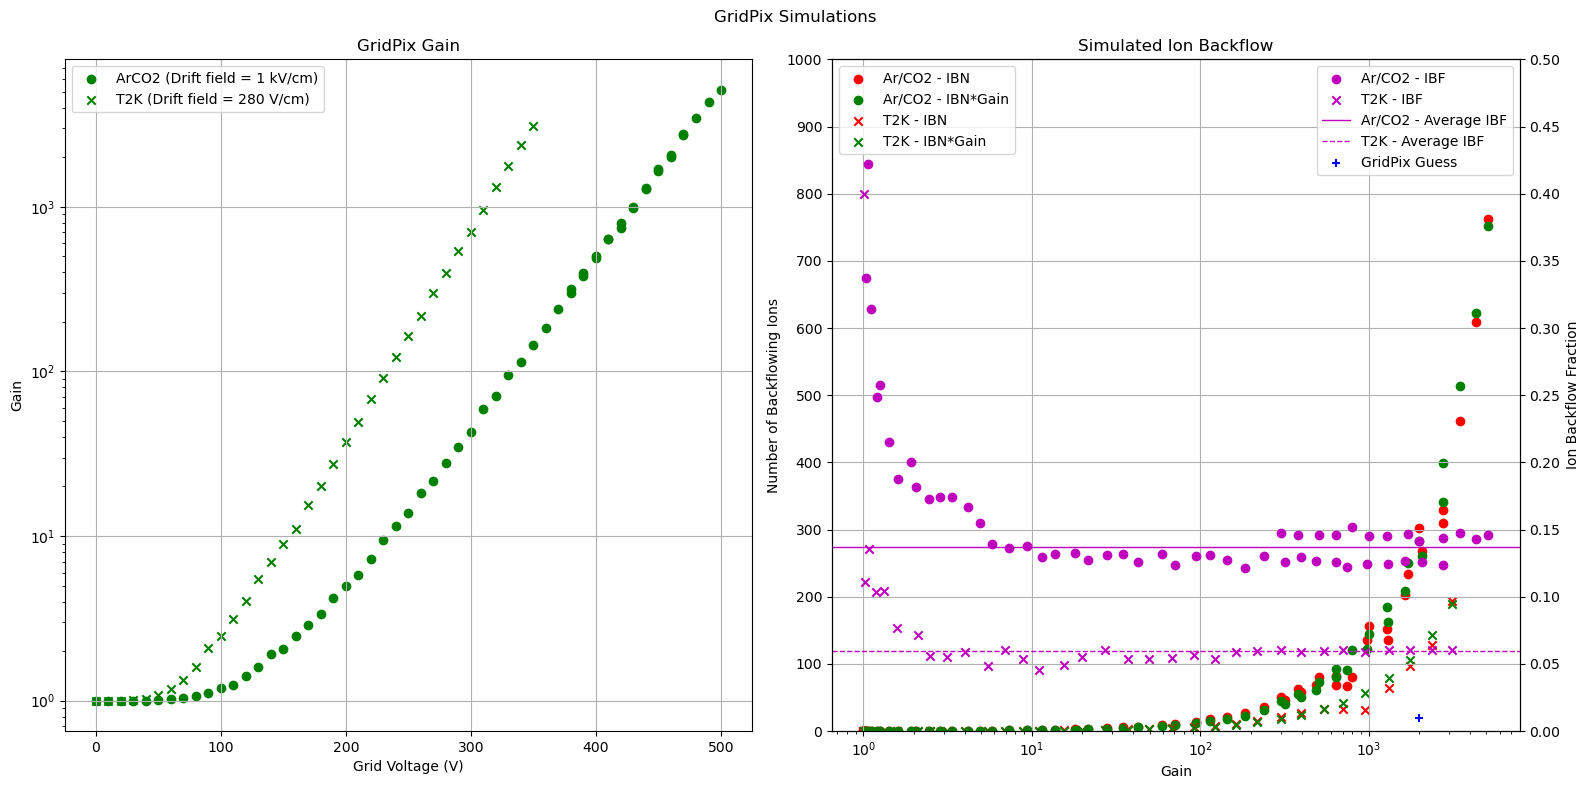

In [7]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle(f'GridPix Simulations')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(
    simVoltages, simGain,
    label='ArCO2 (Drift field = 1 kV/cm)', c='g'
)
ax1.scatter(
    simVoltT2K, T2KGain,
    label='T2K (Drift field = 280 V/cm)', c='g', marker='x'
)


ax2.scatter(
    simGain, simIBN,
    c='r', label='Ar/CO2 - IBN'
)
ax2.scatter(
    simGain, simIBFGain,
    c='g', label='Ar/CO2 - IBN*Gain'
)

ax2.scatter(
    T2KGain, T2KIBN,
    c='r', marker = 'x', label='T2K - IBN'
)
ax2.scatter(
    T2KGain, T2KIBFGain,
    c='g', marker='x', label='T2K - IBN*Gain'
)

ax3 = ax2.twinx()
ax3.scatter(
    simGain, simIBF,
    label='Ar/CO2 - IBF', c='m'
)
ax3.scatter(
    T2KGain, T2KIBF,
    label='T2K - IBF', c='m', marker='x'
)
ax3.axhline(
    y=averageIBF, 
    color='m', linestyle='-', linewidth=1, label='Ar/CO2 - Average IBF'
)
ax3.axhline(
    y=averageT2KIBF, 
    color='m', linestyle='--', linewidth=1, label='T2K - Average IBF'
)
ax3.scatter(
    [2e3], [0.01],
    label='GridPix Guess', c='b', marker='+'
)

ax1.set_title('GridPix Gain')
ax1.set_yscale('log')
ax1.set_xlabel('Grid Voltage (V)')
ax1.set_ylabel('Gain')
ax1.legend()
ax1.grid()

ax2.set_title('Simulated Ion Backflow')
ax2.set_xscale('log')
ax2.set_xlabel('Gain')
ax2.set_ylabel('Number of Backflowing Ions')
ax3.set_ylabel('Ion Backflow Fraction')

ax2.set_ylim([0, 1e3])
ax3.set_ylim([0, .5])
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 11))
ax3.set_yticks(np.linspace(ax3.get_ybound()[0], ax3.get_ybound()[1], 11))

ax2.legend(loc='upper left')
ax3.legend(loc='upper right')
ax2.grid()

plt.tight_layout()
plt.show()

In [19]:
gain2K = runData(20008)
print(gain2K.getRunParameter('Raw Gain'))

1998.446


Fit converged. Gain: 2024.855 (+/- 59.774), Theta: 0.961 (+/- 0.107)
Fit converged. Gain: 3020.347 (+/- 217.904), Theta: 0.000 (+/- 0.049)


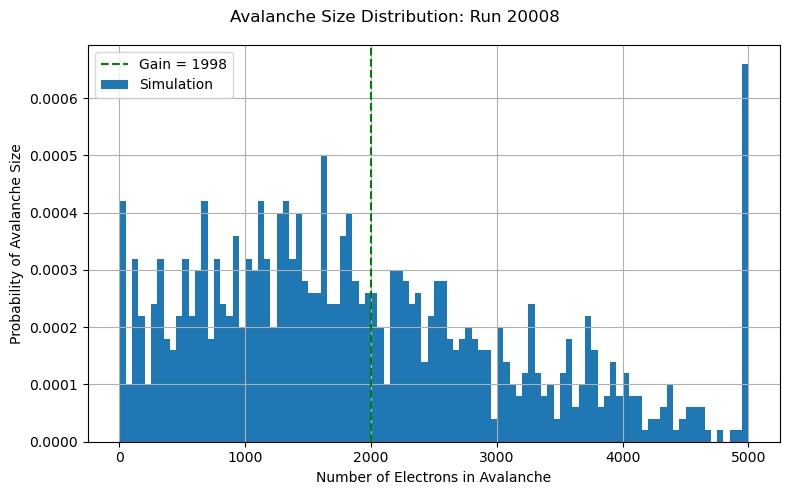

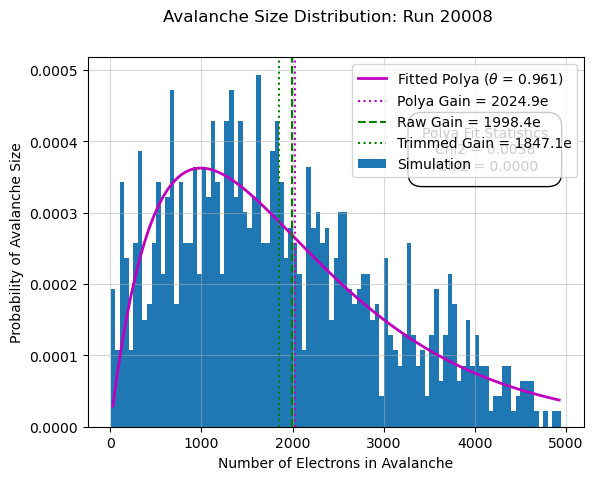

In [23]:
binW = 50
_ = gain2K.plotAvalancheSize(binWidth=binW)
_ = gain2K.plotAvalancheFits(binWidth=binW)